<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o_2_Fisqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== PARÂMETROS ===
Constante de Boltzmann (k): 1.381e-23 J/K
Comprimento de persistência (l): 4.50e-08 m (45 nm)
Número de unidades (N): 200
Temperatura assumida (T): 300 K

=== (a.1) LIMITAÇÕES DO MODELO DE HOOKE ===
1. Assume linearidade da força restauradora, o que não é real para DNA
2. Ignora a natureza entrópica da elasticidade do DNA
3. Não captura o comportamento assintótico quando a cadeia está quase totalmente estendida
4. Superestima a força necessária para grandes extensões
5. Não considera a natureza discreta da cadeia polimérica

=== (a.2) TRABALHO NO MODELO DE HOOKE ===
w = (1/2)·kF·x² (para extensão a partir do equilíbrio)


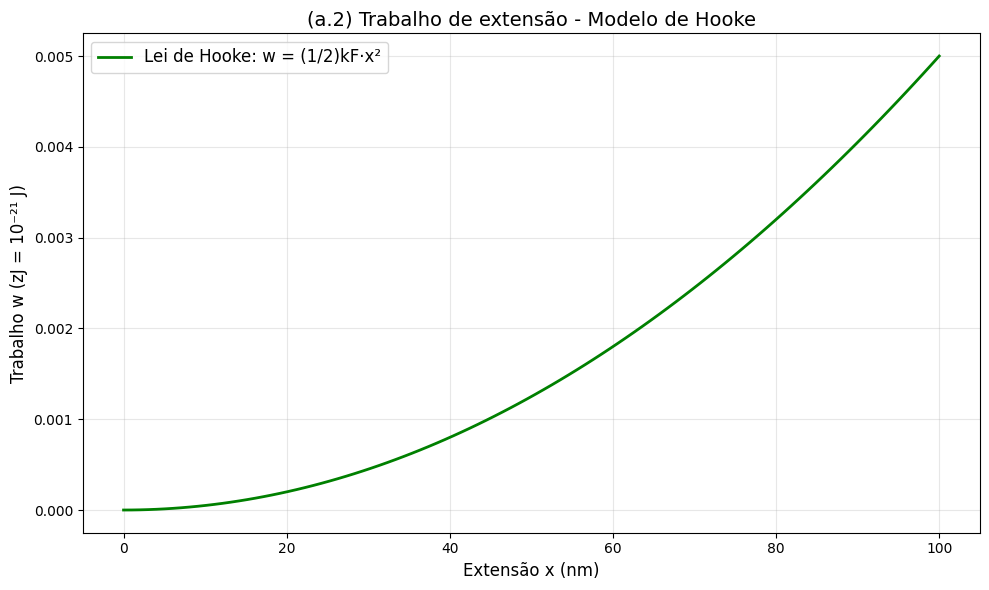

=== (b.1) LIMITAÇÕES DO MODELO DE CADEIA ARTICULADA UNIDIMENSIONAL ===
1. Restrição unidimensional não é realista (DNA move-se em 3D)
2. Ângulos discretos de 0° ou 180° são simplificação excessiva
3. Não considera interações eletrostáticas entre segmentos
4. Ignora efeitos de volume excluído
5. Assume segmentos rígidos perfeitos
6. Aproximação torna-se pobre para cadeias muito curtas

=== (b.2) FORÇA PARA EXTENSÃO DE 90 nm ===
Extensão desejada: 90.0 nm
Comprimento total da cadeia: 9000.0 nm
Parâmetro v = n/N = 0.010
Força necessária: 0.00 pN



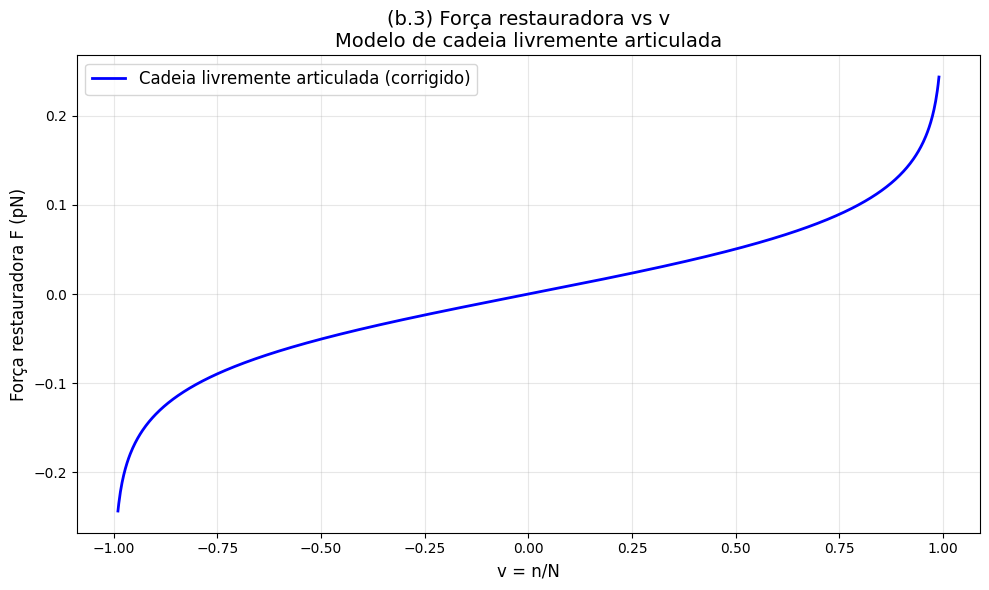

=== COMPARAÇÃO COM LEI DE HOOKE ===
Diferenças observadas:
- Resposta não-linear vs linear da Lei de Hooke
- Comportamento assimétrico para v positivo e negativo
- Força diverge quando |v| → 1 (extensão máxima)
- Natureza entrópica vs energética
- Menor força para pequenas extensões, maior força para grandes extensões

=== (b.4) EXPRESSÃO PARA O TRABALHO ===
Dados: x = n·l = v·N·l ⇒ dx = N·l·dv
Trabalho diferencial: dw = F·dx = F·N·l·dv
Trabalho total: w = N·l · ∫ F(v) dv
Onde F(v) = (kT/2l) · ln[(1+v)/(1-v)]
Portanto: w = (N·k·T / 2) · ∫ ln[(1+v)/(1-v)] dv

=== (b.5) TRABALHO DE EXTENSÃO DE v=0 A v=1.0 ===
Trabalho calculado: 5.707e-19 J
Trabalho em zJ (zeptoJoules): 570.73 zJ
Trabalho em kT: 137.76 kT
Erro estimado da integração: 2.538e-19 J

Nota: A integral diverge em v=1 (força infinita),
portanto o valor representa o trabalho para extensão
próxima da extensão máxima teórica.



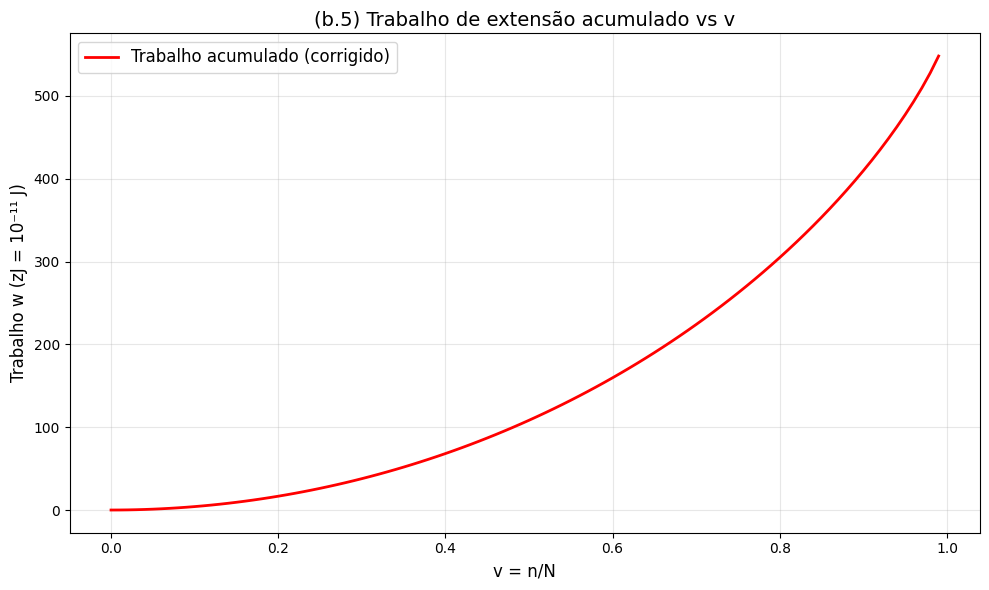

=== ANÁLISE FINAL ===
O modelo de cadeia articulada unidimensional:
- Mostra comportamento não-linear característico de polímeros
- Força diverge na extensão máxima (v=1)
- Trabalho de extensão cresce rapidamente próximo à extensão máxima
- Fornece descrição mais realista que o modelo de Hooke para DNA


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# =============================================================================
# CONSTANTES E PARÂMETROS
# =============================================================================
k = 1.381e-23      # Constante de Boltzmann (J/K)
l = 45e-9          # Comprimento de persistência (m)
N = 200            # Número de unidades
T = 300            # Temperatura ambiente assumida (K) - 27°C

print("=== PARÂMETROS ===")
print(f"Constante de Boltzmann (k): {k:.3e} J/K")
print(f"Comprimento de persistência (l): {l:.2e} m ({l*1e9:.0f} nm)")
print(f"Número de unidades (N): {N}")
print(f"Temperatura assumida (T): {T} K\n")

# =============================================================================
# (a.1) LIMITAÇÕES DO MODELO DE HOOKE
# =============================================================================
print("=== (a.1) LIMITAÇÕES DO MODELO DE HOOKE ===")
print("1. Assume linearidade da força restauradora, o que não é real para DNA")
print("2. Ignora a natureza entrópica da elasticidade do DNA")
print("3. Não captura o comportamento assintótico quando a cadeia está quase totalmente estendida")
print("4. Superestima a força necessária para grandes extensões")
print("5. Não considera a natureza discreta da cadeia polimérica\n")

# =============================================================================
# (a.2) TRABALHO NO MODELO DE HOOKE
# =============================================================================
print("=== (a.2) TRABALHO NO MODELO DE HOOKE ===")
print("w = (1/2)·kF·x² (para extensão a partir do equilíbrio)")

# Parâmetros para o gráfico de Hooke (kF arbitrário para visualização)
kF = 1e-9  # Constante de força arbitrária (N/m)
x_values = np.linspace(0, 100e-9, 100)  # De 0 a 100 nm
w_hooke = 0.5 * kF * x_values**2

plt.figure(figsize=(10, 6))
plt.plot(x_values*1e9, w_hooke*1e21, 'g-', linewidth=2, label='Lei de Hooke: w = (1/2)kF·x²')
plt.xlabel('Extensão x (nm)', fontsize=12)
plt.ylabel('Trabalho w (zJ = 10⁻²¹ J)', fontsize=12)
plt.title('(a.2) Trabalho de extensão - Modelo de Hooke', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# =============================================================================
# (b.1) LIMITAÇÕES DO MODELO DE CADEIA ARTICULADA UNIDIMENSIONAL
# =============================================================================
print("=== (b.1) LIMITAÇÕES DO MODELO DE CADEIA ARTICULADA UNIDIMENSIONAL ===")
print("1. Restrição unidimensional não é realista (DNA move-se em 3D)")
print("2. Ângulos discretos de 0° ou 180° são simplificação excessiva")
print("3. Não considera interações eletrostáticas entre segmentos")
print("4. Ignora efeitos de volume excluído")
print("5. Assume segmentos rígidos perfeitos")
print("6. Aproximação torna-se pobre para cadeias muito curtas\n")

# =============================================================================
# (b.2) FORÇA PARA EXTENSÃO DE 90 nm (CORRIGIDO COM FATOR 1/2)
# =============================================================================
x = 90e-9          # Extensão (m)
n = x / l          # Número de unidades estendidas
v = n / N          # Parâmetro v

F = (k * T / (2*l)) * np.log((1 + v) / (1 - v))   # << corrigido
print("=== (b.2) FORÇA PARA EXTENSÃO DE 90 nm ===")
print(f"Extensão desejada: {x*1e9:.1f} nm")
print(f"Comprimento total da cadeia: {N*l*1e9:.1f} nm")
print(f"Parâmetro v = n/N = {v:.3f}")
print(f"Força necessária: {F*1e12:.2f} pN\n")

# =============================================================================
# (b.3) GRÁFICO DA FORÇA RESTAURADORA vs v (CORRIGIDO)
# =============================================================================
v_values = np.linspace(-0.99, 0.99, 1000)
F_values = (k * T / (2*l)) * np.log((1 + v_values) / (1 - v_values))  # << corrigido

plt.figure(figsize=(10, 6))
plt.plot(v_values, F_values*1e12, 'b-', linewidth=2, label='Cadeia livremente articulada (corrigido)')
plt.xlabel('v = n/N', fontsize=12)
plt.ylabel('Força restauradora F (pN)', fontsize=12)
plt.title('(b.3) Força restauradora vs v\nModelo de cadeia livremente articulada', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

print("=== COMPARAÇÃO COM LEI DE HOOKE ===")
print("Diferenças observadas:")
print("- Resposta não-linear vs linear da Lei de Hooke")
print("- Comportamento assimétrico para v positivo e negativo")
print("- Força diverge quando |v| → 1 (extensão máxima)")
print("- Natureza entrópica vs energética")
print("- Menor força para pequenas extensões, maior força para grandes extensões\n")

# =============================================================================
# (b.4) EXPRESSÃO PARA O TRABALHO (CORRIGIDO)
# =============================================================================
print("=== (b.4) EXPRESSÃO PARA O TRABALHO ===")
print("Dados: x = n·l = v·N·l ⇒ dx = N·l·dv")
print("Trabalho diferencial: dw = F·dx = F·N·l·dv")
print("Trabalho total: w = N·l · ∫ F(v) dv")
print("Onde F(v) = (kT/2l) · ln[(1+v)/(1-v)]")
print("Portanto: w = (N·k·T / 2) · ∫ ln[(1+v)/(1-v)] dv\n")

# =============================================================================
# (b.5) CÁLCULO DO TRABALHO DE v=0 A v=1.0 (CORRIGIDO)
# =============================================================================
def forca_v(v):
    """Função força em termos de v (corrigida)"""
    return (k * T / (2*l)) * np.log((1 + v) / (1 - v))

def integrando_trabalho(v):
    """Integrando para o cálculo do trabalho"""
    return forca_v(v) * N * l  # F * dx/dv

# Integração numérica de v=0 a v=0.999 (evitando singularidade)
v_inicio = 0.0
v_fim = 0.999

resultado, erro = integrate.quad(integrando_trabalho, v_inicio, v_fim)
w = resultado

print("=== (b.5) TRABALHO DE EXTENSÃO DE v=0 A v=1.0 ===")
print(f"Trabalho calculado: {w:.3e} J")
print(f"Trabalho em zJ (zeptoJoules): {w*1e21:.2f} zJ")
print(f"Trabalho em kT: {w/(k*T):.2f} kT")
print(f"Erro estimado da integração: {erro:.3e} J")
print("\nNota: A integral diverge em v=1 (força infinita),")
print("portanto o valor representa o trabalho para extensão")
print("próxima da extensão máxima teórica.\n")

# Gráfico do trabalho acumulado
v_range = np.linspace(0, 0.99, 100)
w_acumulado = np.zeros_like(v_range)

for i, v_val in enumerate(v_range):
    if i > 0:
        w_acumulado[i], _ = integrate.quad(integrando_trabalho, 0, v_val)

plt.figure(figsize=(10, 6))
plt.plot(v_range, w_acumulado*1e21, 'r-', linewidth=2, label='Trabalho acumulado (corrigido)')
plt.xlabel('v = n/N', fontsize=12)
plt.ylabel('Trabalho w (zJ = 10⁻¹¹ J)', fontsize=12)
plt.title('(b.5) Trabalho de extensão acumulado vs v', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

print("=== ANÁLISE FINAL ===")
print("O modelo de cadeia articulada unidimensional:")
print("- Mostra comportamento não-linear característico de polímeros")
print("- Força diverge na extensão máxima (v=1)")
print("- Trabalho de extensão cresce rapidamente próximo à extensão máxima")
print("- Fornece descrição mais realista que o modelo de Hooke para DNA")